## Jupyter Notebook for PlantCLEF 2025 Competition

Author: Jacob A Rose

Date: Mon Apr 14th, 2025

Highlights:
- Downloads the metadata for the PlantCLEF 2025 dataset using Kaggle API.
- Defines utility functions for processing dataset file paths.
- Prepares inputs for training and validation using class mappings.

Note: Ensure Kaggle API is configured and accessible before running the notebook.

In [1]:
# !uv pip install kaggle

In [2]:
# %%bash

# data_dir=${HOME}/plantclef-vision/data/plantclef2025/competition-metadata
# mkdir -p $data_dir
# kaggle competitions download -c plantclef-2025 -p $data_dir
# unzip -q -o $data_dir/plantclef-2025.zip -d $data_dir

In [3]:
# rsync -ah --progress "plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800" "plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800"

In [ ]:
# !find PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800/* -maxdepth 0 -type d | wc -l

In [12]:
!git config --global user.name "Jacob A Rose"
!git config --global user.email jacobrose.codes@gmail.com

In [1]:
import os

analysis_dir = os.path.expanduser("~/plantclef-vision/results/analysis")
os.makedirs(analysis_dir, exist_ok=True)
print(analysis_dir)

/teamspace/studios/this_studio/plantclef-vision/results/analysis


In [6]:
import pandas as pd

train_metadata_path = "/teamspace/studios/this_studio/plantclef-vision/data/plantclef2025/competition-metadata/PlantCLEF2024_single_plant_training_metadata.csv"


train_metadata = pd.read_csv(train_metadata_path, sep=";", low_memory=False)
train_metadata.head()

,image_name,organ,species_id,obs_id,license,partner,author,altitude,latitude,longitude,gbif_species_id,species,genus,family,dataset,publisher,references,url,learn_tag,image_backup_url
0,59feabe1c98f06e7f819f73c8246bd8f1a89556b.jpg,leaf,1396710,1008726402,cc-by-sa,NaN,Gulyás Bálint,205.9261,47.592160,19.362895,5284517.0,Taxus baccata L.,Taxus,Taxaceae,plantnet,plantnet,https://identify.plantnet.org/fr/k-southwester...,https://bs.plantnet.org/image/o/59feabe1c98f06...,train,https://lab.plantnet.org/LifeCLEF/PlantCLEF202...
1,dc273995a89827437d447f29a52ccac86f65476e.jpg,leaf,1396710,1008724195,cc-by-sa,NaN,vadim sigaud,323.7520,47.906703,7.201746,5284517.0,Taxus baccata L.,Taxus,Taxaceae,plantnet,plantnet,https://identify.plantnet.org/fr/k-southwester...,https://bs.plantnet.org/image/o/dc273995a89827...,train,https://lab.plantnet.org/LifeCLEF/PlantCLEF202...
2,416235e7023a4bd1513edf036b6097efc693a304.jpg,leaf,1396710,1008721908,cc-by-sa,NaN,fil escande,101.3160,48.826774,2.352774,5284517.0,Taxus baccata L.,Taxus,Taxaceae,plantnet,plantnet,https://identify.plantnet.org/fr/k-southwester...,https://bs.plantnet.org/image/o/416235e7023a4b...,train,https://lab.plantnet.org/LifeCLEF/PlantCLEF202...
3,cbd18fade82c46a5c725f1f3d982174895158afc.jpg,leaf,1396710,1008699177,cc-by-sa,NaN,Desiree Verver,5.1070,52.190427,6.009677,5284517.0,Taxus baccata L.,Taxus,Taxaceae,plantnet,plantnet,https://identify.plantnet.org/fr/k-southwester...,https://bs.plantnet.org/image/o/cbd18fade82c46...,train,https://lab.plantnet.org/LifeCLEF/PlantCLEF202...
4,f82c8c6d570287ebed8407cefcfcb2a51eaaf56e.jpg,leaf,1396710,1008683100,cc-by-sa,NaN,branebrane,165.3390,45.794739,15.965862,5284517.0,Taxus baccata L.,Taxus,Taxaceae,plantnet,plantnet,https://identify.plantnet.org/fr/k-southwester...,https://bs.plantnet.org/image/o/f82c8c6d570287...,train,https://lab.plantnet.org/LifeCLEF/PlantCLEF202...


In [9]:
# train_metadata.info()

# short_cols = train_metadata.columns[train_metadata.columns.str.len() < 20]

short_cols = [
    "organ",
    "species_id",
    "obs_id",
    "license",
    "author",
    "altitude",
    "latitude",
    "longitude",
    "gbif_species_id",
    "species",
    "genus",
    "family",
    "dataset",
    "publisher",
    "learn_tag",
]

In [7]:
# !pip install ydata-profiling

In [10]:
%%time


from ydata_profiling import ProfileReport

df = train_metadata.sample(frac=0.1)
df = df[short_cols]
profile = ProfileReport(df, title="PlantCLEF2024 Metadata Report", minimal=True)
# profile.to_file(f"{analysis_dir}/plantclef2024_metadata_report.html")


# profile = ProfileReport(train_metadata, title="PlantCLEF2024 Metadata Report", explorative=True)

CPU times: user 164 ms, sys: 4.6 ms, total: 168 ms
Wall time: 364 ms


In [11]:
profile.to_file(f"{analysis_dir}/plantclef2024_metadata_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


  0%|          | 0/15 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:01<00:00, 11.48it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [1]:
import os
from tqdm import tqdm
from pprint import pprint


dataset_dir = "/teamspace/studios/this_studio/plantclef-vision/data/plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800"

image_paths = [
    os.path.join(root, filename)
    for root, _, filenames in tqdm(os.walk(dataset_dir), smoothing=0)
    for filename in filenames
]

pprint(image_paths[:5])

7807it [00:07, 1021.80it/s]

['/teamspace/studios/this_studio/plantclef-vision/data/plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800/1362952/2c0905eea76327b0d2bf5d54346e6ec720cac3ee.jpg',
 '/teamspace/studios/this_studio/plantclef-vision/data/plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800/1362952/f3278ff03787528ae0036cf9504867cab64ec4bf.jpg',
 '/teamspace/studios/this_studio/plantclef-vision/data/plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800/1362952/04d017e8a897134ac1cceb91befa7104c7fc2eca.jpg',
 '/teamspace/studios/this_studio/plantclef-vision/data/plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800/1362952/766a778b9e4b018e6a18a88ccec40a7c64d5f40e.jpg',
 '/teamspace/studios/this_studio/plantclef-vision/data/plantclef2025/PlantCLEF2024singleplanttrainingdata_800_max_side_size/images_max_side_800/1362952/1ec835cc4b4ab28b01d18031ac635e7b794ddb6b.jpg']


In [2]:
from PIL import Image
import matplotlib.pyplot as plt


def plot_image_grid(image_paths, grid_size=(3, 3), figsize=(10, 10)):
    """
    Plots a grid of images from a list of file paths.

    Args:
        image_paths (list): List of image file paths.
        grid_size (tuple): Tuple specifying the grid size (rows, cols).
        figsize (tuple): Tuple specifying the figure size.
    """
    rows, cols = grid_size
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(image_paths):
            img = Image.open(image_paths[i])
            ax.imshow(img)
            ax.axis("off")
        else:
            ax.axis("off")

    plt.tight_layout()
    plt.show()

In [5]:
print(f"{len([i for i in image_paths if i.endswith('.jpg')])}")
print(f"{len(image_paths)}")

1408033
1408033


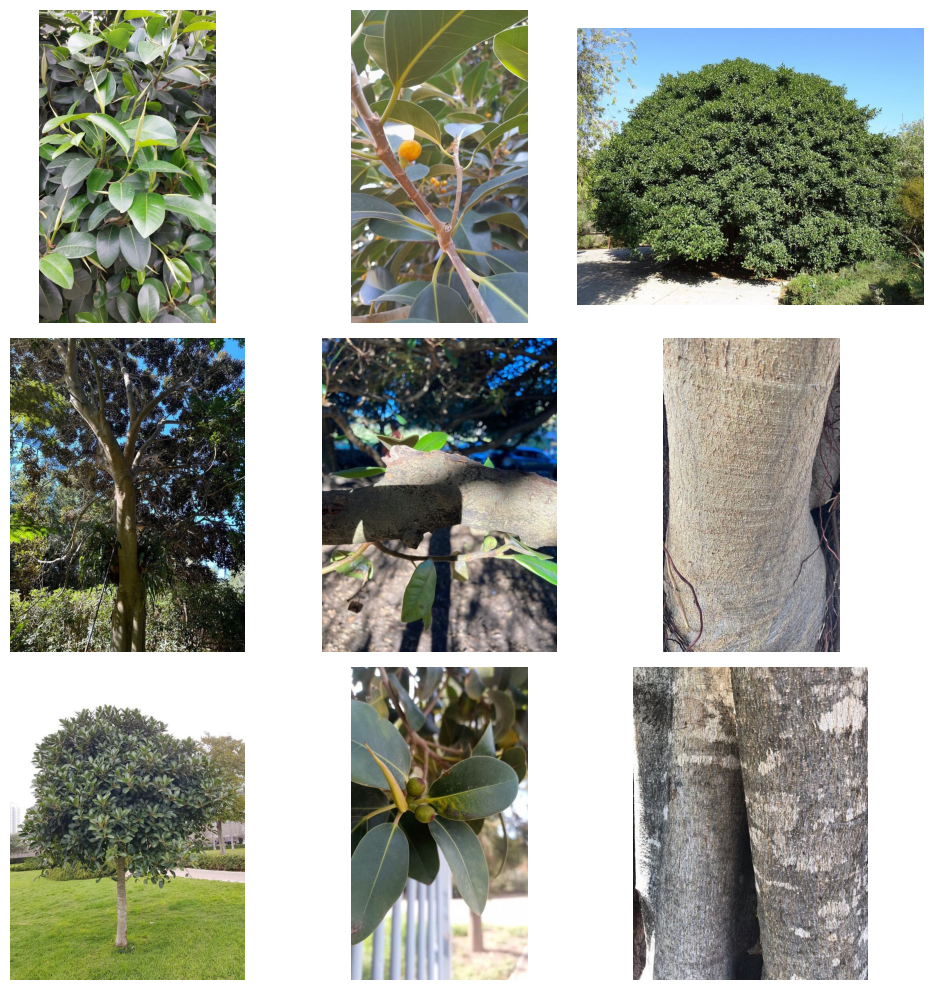

In [3]:
plot_image_grid(image_paths[:10], grid_size=(3, 3), figsize=(10, 10))

In [ ]:
# def get_class_from_filepath(filepath: str, classes) -> int:
#     class_name = filepath.split("/")[-2]
#     return classes[class_name]


# def get_inputs(input_dir: str) -> Any:
#     classes = load_imagenet_class_index()
#     filepaths = np.random.permutation(
#         [
#             os.path.join(root, filename)
#             for root, _, filenames in tqdm(walk(input_dir), smoothing=0)
#             for filename in filenames
#         ]
#     )
#     if "train" in input_dir:
#         return [
#             (filepath, get_class_from_filepath(filepath, classes))
#             for filepath in filepaths
#         ]

#     class_names = load_imagenet_val_class_names()
#     return [
#         (filepath, class_names_to_index_map[class_name])
#         for filepath, class_name in zip(filepaths, class_names)
#     ]